# 데이터 전처리

In [1]:
from torchvision import datasets, transforms
from torch.utils import data 

# Data loader
train_loader = data.DataLoader(
    datasets.FashionMNIST( root='dataset/',
                    train=True,
                    download=True,
                    transform=transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std=(0.5,))
                    ])
    ),
    batch_size=32,
    shuffle=False
)

# Data loader
test_loader = data.DataLoader(
    datasets.FashionMNIST( root='dataset/',
                    train=False,
                    download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std=(0.5,))
                    ])
    ),
    batch_size=32,
    shuffle=False
)

len(train_loader), len(test_loader)

(1875, 313)

In [2]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [3]:
images[0].shape

torch.Size([1, 28, 28])

In [4]:
import numpy as np
import torch
torch_image = torch.squeeze(images[0])
print(torch_image.shape)

torch.Size([28, 28])


In [5]:
torch_image.numpy()

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

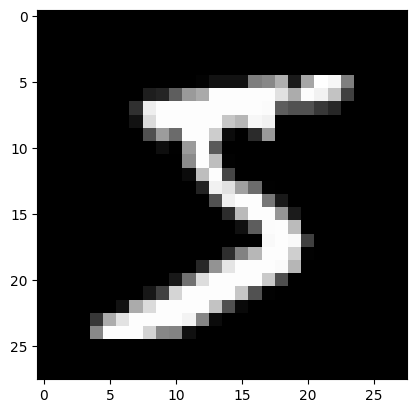

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import matplotlib.pyplot as plt

plt.imshow(torch_image.numpy(),'gray')
plt.show()

In [7]:
labels[0]

tensor(5)

# CNN

## Model 정의

In [12]:
import torch
import torch.nn as nn

In [13]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [14]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [15]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

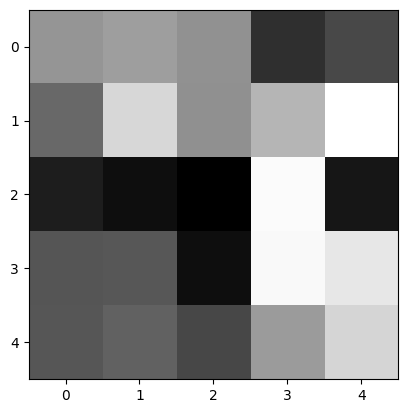

In [17]:
plt.imshow(weight[0,0,:,:],'gray')
plt.show()

In [19]:
output_data = layer(images)
output_data = output_data.data
output = output_data.cpu().numpy()
output.shape

(32, 20, 24, 24)

In [ ]:
class Ann(nn.Module):
    def __init__(self, dropout=0.2):
        super(Ann, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
        self.dropout = dropout
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.dropout(x, training=self.training, p=self.dropout)
        x = self.fc3(x)
        return x

In [ ]:
model = Ann().to(device)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model.train()

In [ ]:
data, target = images.to(device), labels.to(device)
data.shape, target.shape

In [ ]:
# optimizer.zero_grad()
# output = model(data)
# loss = f.cross_entropy(output, target)
# loss.backward()
# optimizer.step()

## 학습

In [ ]:
# EPOCHS = 10
# model = Ann().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01)
# for epoch in range(1, EPOCHS+1):
#     model.train()
#     for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = f.cross_entropy(output, target)
#         loss.backward()
#         optimizer.step()
#     print("Train Epoch:{} \tLoss:{:.6f}".format(epoch, loss.item()))

## 평가

In [ ]:
EPOCHS = 10
model = Ann(dropout=0.2).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
train_history = []
test_history = []
for epoch in range(1, EPOCHS+1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = f.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    print("Train Epoch:{} \tLoss:{:.6f}".format(epoch, loss.item()))
    train_history.append(loss.item())

    model.eval()

    test_loss=0
    correct=0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += f.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_history.append(test_loss)
    print("Test set:Average Loss:{:.4f}, Accuracy:{:.0f}%\n".format(test_loss, correct/len(test_loader.dataset)*100))
    




In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history, c='g')
plt.plot(test_history, c='r')
plt.show()

## 성능 개선

### 과적합

### 과적합 해결책
- 데이터 정규화
- Dropout
- 데이터 더 모으기